# The Power of Python

![logo](python-logo.png)

In [1]:
from __future__ import print_function

In [2]:
#from notebook.services.config import ConfigManager
#cm = ConfigManager()
#cm.update('livereveal', {
#              'scroll': True,
#})


## Computers in Science

* All types of scientific research require computation
  * _observation / experimentation_ : data analysis / reduction, gathering data, ...
  * _computation_ : simulation codes (e.g. solving a system of PDEs) and modeling
  * _theory_ : computer algebra systems, Monte Carlo realizations, ...

![wdmerger](wdmerger_08030_new.png)

## Why Python?

* very accessible
* high-level language
  * lots of data complex container classes are built into the language
  * easy to write complex tasks as short functions
* very readable
* supports a wide range of programming paradigms
  * object-oriented
  * functional
  * procedural
* among the most popular languages (in terms of code development, job ads, stackoverflow questions)

## Example

In [3]:
print("Hello World")

Hello World


## More Complex Example

In [4]:
import random

for n in range(5):
    # random() returns a number in [0, 1)
    a = random.random()

    if a < 0.5:
        print("heads")
    else:
        print("tails")

tails
heads
tails
tails
tails


## Object-oriented

* Object-oriented programming is a natural way to group data and methods that operated on it
  * a `class` describes the data-structure
  * you work on objects -- _instances_ of the class
  * makes it easy to pass around complex groups of related data
  * you can query a python class to find out what it provides
* In python, everything is an object

In [5]:
import math

class Projectile(object):
    """projectile launched at an angle theta (degrees) 
       from +x with a velocity v (SI units)"""
    def __init__(self, theta, v, g=-9.81):
        self.theta = theta
        self.v = v
        self.g = g
        
    def time_of_flight(self):
        """return the time in the air"""
        v_y = self.v*math.sin(math.radians(self.theta))
        return -2*v_y/self.g
        
    def range(self):
        """return the range (in x)"""
        v_x = self.v*math.cos(math.radians(self.theta))
        return v_x*self.time_of_flight()
    
p = Projectile(45, 100)
p.range()

1019.3679918450559

In [6]:
help(Projectile)

Help on class Projectile in module __main__:

class Projectile(__builtin__.object)
 |  projectile launched at an angle theta (degrees) 
 |  from +x with a velocity v (SI units)
 |  
 |  Methods defined here:
 |  
 |  __init__(self, theta, v, g=-9.81)
 |  
 |  range(self)
 |      return the range (in x)
 |  
 |  time_of_flight(self)
 |      return the time in the air
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



## What is Scientific Computing?

* simulation and modeling
* visualization
* analysis / fitting (including machine learning)
* prototyping new algorithms
* _glue_ to build applications linking C, C++, and Fortran code together

## Why _Python_ for Scientific Computing?

* powerful multidimensional array class (`ndarray` from NumPy) is the basis of many libraries
* large standard library
* easy to interface with Fortran and C/C++

Further, python and the scientific libraries are _Free_ (zero cost + open)

## The Scientific Python "Ecosystem"

![scipy](scipy.png)

## What About R, IDL, matlab, ...

* One of python's strengths is that it is _Free_ (zero-cost and open)
* python is more general purpose than these
* Compared to R:
  * both are _Free_
  * R is a strong choice for data analysis -- that is its target
    * python's stats packages are growing fast
* Compared to IDL:
  * IDL's language design is old, with OO features added later in a clumsy fashion
  * IDL is expensive
* Compared to matlab:
  * matlab is expensive (although octave fill in for a lot of applications)
  * excels at linear algebra, but doesn't have the high-level language constructs of python

## Jupyter Notebooks

* The _killer-app_ of python is the Jupyter (formerly ipython) notebook
  * integrates plain text, LaTeX typesetting, code and output, plots, widgets, ..., in a web-based container
  * easy to share
  * allows for reproducible and archivable research work flows
* This talk is a notebook

![notebook](jupyter-example.png)

## Some Examples

Key things to keep in mind:
* all of this functionality is provided by Free libraries
* code is pretty concise
* lots of help is available online
* the python community is very _welcoming_

## NumPy

* NumPy provides a multidimensional array class
* all elements are the same type, memory is allocated upon creation
* power comes from array operations
  * these are written in compiled language and run fast
  * allows for near-C-like performance when you avoid loops (vectorized programming)
  
A large number of scientific applications require the use of arrays for storing data 

In [7]:
import numpy as np

a = np.arange(15).reshape(3,5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
a*2 + 5

array([[ 5,  7,  9, 11, 13],
       [15, 17, 19, 21, 23],
       [25, 27, 29, 31, 33]])

## matplotlib

* matplotlib is the standard plotting package (although many alternates exist)
* produces publication quality output
* many plot styles (line, surface, pseudocolor / heat maps, 3-d axes, charts, histograms, ...)
* works together with the standard libraries to allow for easy visualization

In [9]:
%matplotlib inline


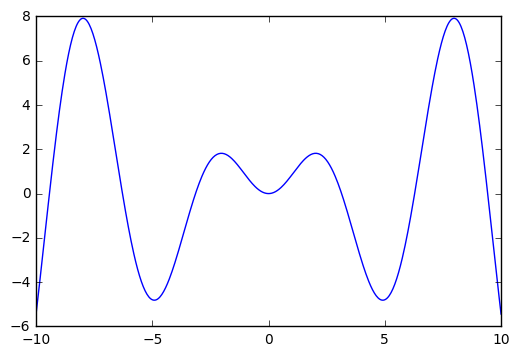

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(-10.0, 10.0, 500)
plt.plot(x, x*np.sin(x))

best resource: the matplotlib gallery

http://matplotlib.org/gallery.html

I've made a number of animations using python, NumPy, and matplotlib:

http://zingale.github.io/astro_animations/

## SciPy

Provides numerical algorithms for:
* integration
* signal processing (FFTs, etc.)
* interpolation
* linear algebra
* ODE integration
* optimization (including fitting and root finding)

and more...

## Ex: Integration

$$\int_{-\infty}^{\infty} e^{-x^2} dx$$

In [11]:
from scipy import integrate

def f(x):
    return np.exp(-x**2)

I, err = integrate.quad(f, -np.inf, np.inf)
print(I, err)

1.77245385091 1.42026367809e-08


## Ex: Fitting to Data

minimize the square-summed distance between the curve and the data points

In [12]:
a0 = 2.5
a1 = 2./3.
sigma = 2.0

a0_orig, a1_orig = a0, a1

x = np.linspace(0.0, 4.0, 25)
y = a0*np.exp(a1*x) + sigma*np.random.randn(len(x))

<Container object of 3 artists>

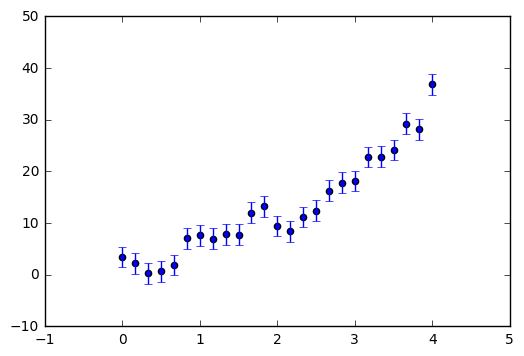

In [13]:
plt.scatter(x,y)
plt.errorbar(x, y, yerr=sigma, fmt="none")

## Fit this to an exponental

In [14]:
import scipy.optimize as optimize

def resid(avec, x, y):
    """the residual -- minimize the sum of the squares"""

    a0, a1 = avec

    # note: if we wanted to deal with error bars, we 
    # would weight each residual accordingly                                                                         
    return y - a0*np.exp(a1*x)

a0, a1 = 1, 1
afit, flag = optimize.leastsq(resid, [a0, a1], args=(x, y))

print(afit)

[ 3.02318638  0.6099237 ]


<Container object of 3 artists>

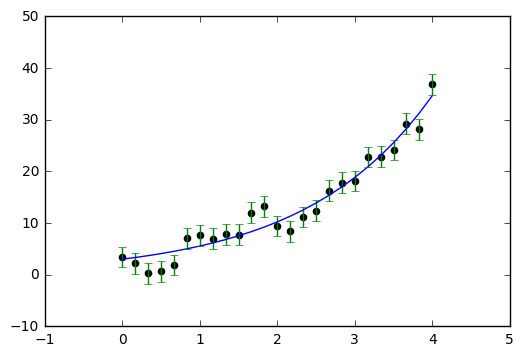

In [15]:
plt.plot(x, afit[0]*np.exp(afit[1]*x))
plt.scatter(x,y, c="k")
plt.errorbar(x, y, yerr=sigma, fmt="none")

## SymPy

SymPy does symbolic math

In [16]:
from sympy import init_session
init_session()

IPython console for SymPy 1.0 (Python 2.7.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


In [17]:
a = cos(x) + I*sin(x)
a

In [18]:
simplify(a)

In [19]:
roots(x**3 - 6*x**2 + 9*x, x)

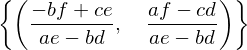

In [20]:
a, b, c, d, e, f = symbols('a, b, c, d, e, f')

eqns = [a*x + b*y - c, d*x + e*y - f]
linsolve(eqns, x, y)

## pandas

## How I Use Python

* general scripting / automating tasks (e.g., backup, note/record keeping, job management)
* prototyping new algorithms (e.g., pyro: https://github.com/zingale/pyro2)
* visualization and analysis
* sympy for linear algebra derivations (eigenvalues and eigenvectors)
* build system automation

## yt

A library for visualizing volumetric data

![wdmerger](wdmerger_08030_new.png)

## Learning More

* python tutorial
* _Effective Computation in Physics_
* install _anaconda python_ distribution and start playing around


In [21]:
1+1